# Neural Digit Visualizer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense  # type: ignore
from tensorflow.keras.activations import linear, relu, sigmoid  # type: ignore

from utils import *

import logging
import warnings

np.set_printoptions(precision=2)
tf.autograph.set_verbosity(0)
tf.random.set_seed(1234)
logging.getLogger("tensorflow").setLevel(logging.ERROR)
warnings.simplefilter(action="ignore", category=FutureWarning)

## 1. Problem Statement

In this project, we will build a neural network to recognize ten handwritten digits, `0-9`. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today, from recognizing zip codes (postal codes) on mail envelopes to identifying amounts written on bank checks.

## 2. Dataset

We will start by loading the dataset for this task.

- The first part of the training set is a 1000 x 400 dimensional vector `X` that contains the input features for the training set:
    - Each training example is a 20x20 pixels grayscale image of the digit.
    - Each pixel is represented by a `1` or a `0` number indicating the intensity at that location.
    - The 20 by 20 grid of pixels is unrolled into a 400-dimensional vector.

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set:
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

In [3]:
X, y = load_data() # _ * 400, _ * 1

In [4]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(200, 400)
(200,)


In [5]:
X_0 = np.array(
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
    ]
)

X_1 = np.array(
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        0.25,
        1,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        1,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0.25,
        0.25,
        0.25,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
    ]
)

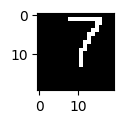

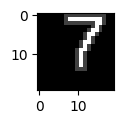

In [6]:
display_digit(X_0)
display_digit(X_1)

## 3. Visualizing the Data

Let's begin by visualizing a subset of the training set.

In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20x20 pixels grayscale image and displays the images together.

The label for each image is displayed above the image.

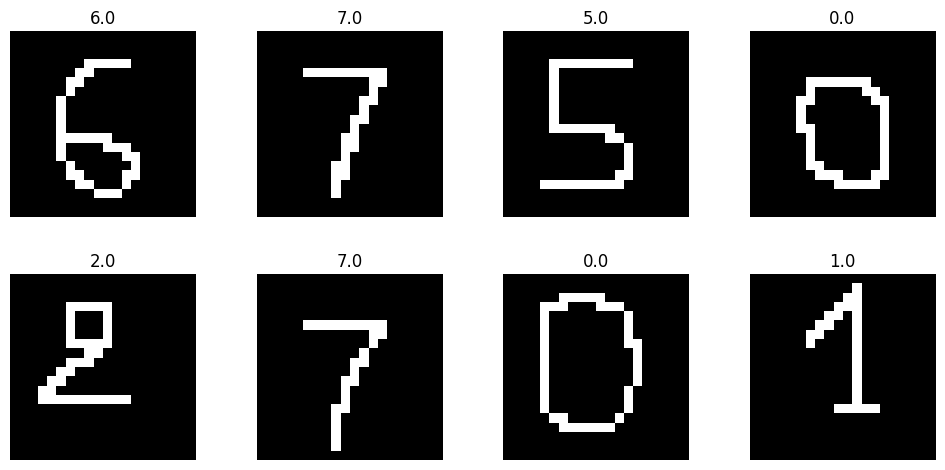

In [7]:
m, n = X.shape

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.tight_layout(pad=1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20))
    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(y[random_index])
    ax.set_axis_off()

## 4. Model Representation

The neural network we are building is shown in the figure below.

This has the following structure:
- Two dense layers with ReLU activations
- An output layer with a linear activation

<center>
    <img src="./Images/model-representation.png" alt="Model Representation" height="300" />
</center>

## 5. TensorFlow Model Implementation

In [8]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation="relu", name="L1"),
        Dense(units=15, activation="relu", name="L2"),
        Dense(units=10, activation="linear", name="L3")
    ],
    name="ndv_model",
)

In [9]:
model.summary()

Model: "ndv_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
[L1, L2, L3] = model.layers

In [11]:
W1, b1 = L1.get_weights()
W2, b2 = L2.get_weights()
W3, b3 = L3.get_weights()

print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")
print(f"W3 shape: {W3.shape}, b3 shape: {b3.shape}")

W1 shape: (400, 25), b1 shape: (25,)
W2 shape: (25, 15), b2 shape: (15,)
W3 shape: (15, 10), b3 shape: (10,)


In [12]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X, y,
    epochs=40
)

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.3504
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2427 
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1779
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1161 
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0474
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9738
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8957
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8110
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7178 
Epoch 10/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6185
Epoch 11/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5145
Epoch 12/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4074
Epoch 13/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2997
Epoch 14/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1925 
Epoch 15/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0887
Epoch 16/40
7/7 ━━━━━━━━━━━━━━

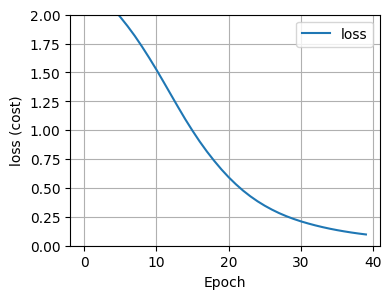

In [13]:
plot_loss_tf(history)

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

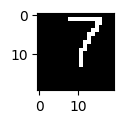

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicting a 'Seven': [[-1.84 -1.3  -0.22 -1.7  -0.18 -1.2  -0.36  4.38 -1.43 -1.95]]
Largest prediction index: 7


In [40]:
image_of_seven = X[0]

image_of_two = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

display_digit(image_of_seven)

prediction = model.predict(image_of_seven.reshape(1, 400))

print(f"Predicting a 'Seven': {prediction}")
print(f"Largest prediction index: {np.argmax(prediction)}")

The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [43]:
prediction_prb = tf.nn.softmax(prediction)
probabilities = " ".join([f"{prob:2.3f}" for prob in prediction_prb[0]])

print(f"Predicting a 'Seven' probability vector: {probabilities}")
print(f"Total of predictions: {np.sum(prediction_prb):0.3f}")

Predicting a 'Seven' probability vector: 0.002 0.003 0.010 0.002 0.010 0.004 0.008 0.957 0.003 0.002
Total of predictions: 1.000


In [45]:
yhat = np.argmax(prediction_prb)
print(f"np.argmax(prediction_prb): {yhat}")

np.argmax(prediction_prb): 7


Let's compare the predictions `vs` the labels for a random sample of 8 digits.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


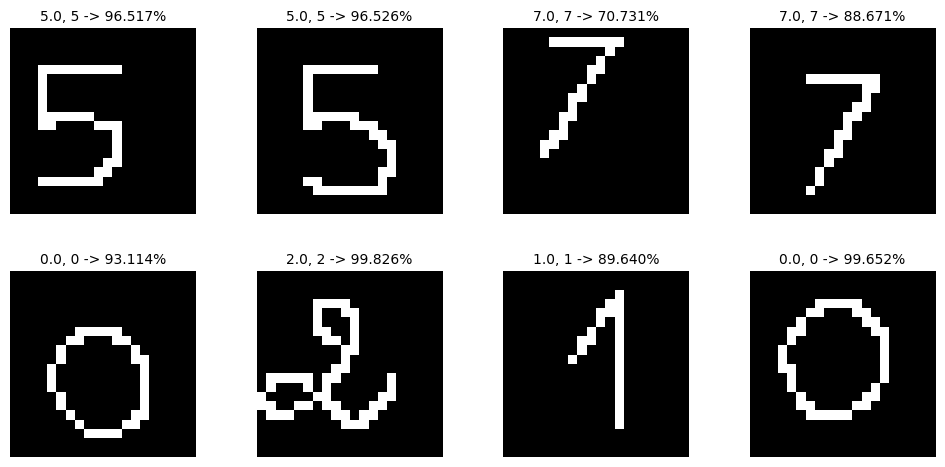

In [52]:
m, n = X.shape

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.tight_layout(pad=1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20))

    ax.imshow(X_random_reshaped, cmap='gray')

    prediction = model.predict(X[random_index].reshape(1, 400))
    prediction_prb = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_prb)

    ax.set_title(f"{y[random_index]}, {yhat} -> {np.max(prediction_prb)*100:2.3f}%", fontsize=10)
    ax.set_axis_off()

plt.show()

In [53]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

NameError: name 'display_errors' is not defined